In [107]:
#Import necessary libraries, create dataframe and load it with values
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')
df.shape

(101766, 50)

In [108]:
#Get information about the dataset shape, column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [109]:
#Count missing values. From the output of this line of code, as well as the previous one, we see that columns
#'max_glu_serum' and 'A1Cresult' can't be used for analysis due to overwhelming number of missing values
df.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [110]:
#Check what are the values in 'change' column
df['change'].unique()

array(['No', 'Ch'], dtype=object)

In [111]:
#Replace values 'Ch', 'Yes', 'No' with 1, 1 and 0 respectivly and set the data type to integer
df[['change', 'diabetesMed']] = df[['change', 'diabetesMed']].replace({'Ch': 1, 'No': 0, 'Yes': 1}).astype(int)

pd.set_option('future.no_silent_downcasting', True)

In [112]:
df['diabetesMed'].unique()

array([0, 1])

In [113]:
#Remove rows where gender is unknown
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace=True)

In [114]:
#Remove square brackets and parentheses from the 'age' values, leaving simple intervals
df['age'] = df['age'].str.replace(r'[\[\]()]', '', regex=True)

In [115]:
#Clean 'weight' column as well
df['weight'] = df['weight'].str.replace(r'[\[\]()]', '', regex=True)

## Weight, Gender, Age, Race

In [116]:
#The 'weight' column contains mostly missing values, making it also non-representative
#for the entire dataset. But it's interesting to get a look on the data.
#Filter and subset rows where 'weight' does not equal "?"
weight_df = df[df['weight'] != "?"]
weight_df.shape
print(weight_df)

        encounter_id  patient_nbr             race  gender    age   weight  \
1102         8042082     94466574        Caucasian    Male  50-60   75-100   
1108         8057670     96198543                ?  Female  80-90    50-75   
1132         8235036     79874631        Caucasian  Female  60-70     0-25   
1136         8274126     90421380        Caucasian  Female  40-50   75-100   
1190         8421486     55628172        Caucasian  Female  70-80   75-100   
...              ...          ...              ...     ...    ...      ...   
101456     439606454    113392368  AfricanAmerican    Male  60-70   75-100   
101516     440252540     97508430        Caucasian    Male  60-70  100-125   
101640     442077494     62420742        Caucasian  Female  70-80    50-75   
101667     442577684     78208677        Caucasian    Male  70-80   75-100   
101723     443695760     98476776        Caucasian    Male  60-70  150-175   

        admission_type_id  discharge_disposition_id  admission_

In [117]:
#Group avaliable weight values and count the number of occurrences of each unique value
weight_groups = weight_df.groupby(['weight'])['encounter_id'].count().sort_values(ascending=False)
print(weight_groups)

weight
75-100     1336
50-75       897
100-125     625
125-150     145
25-50        97
0-25         48
150-175      35
175-200      11
>200          3
Name: encounter_id, dtype: int64


<Axes: xlabel='weight'>

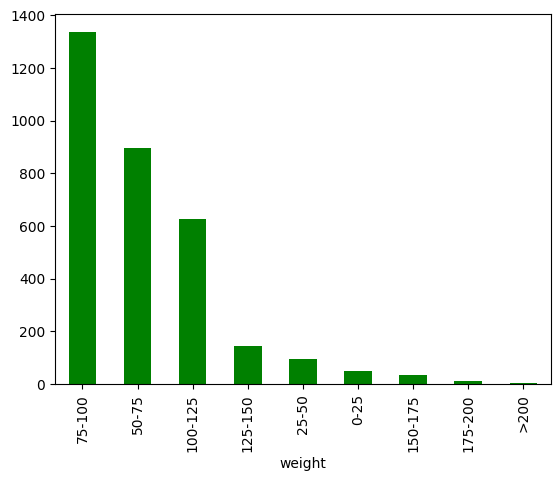

In [118]:
#Visuzlize weight groups
weight_groups.plot(kind='bar', color='g')

In [141]:
#Race composition around this particular hospital
df['race'].value_counts()

,count
race,
Caucasian,76099
AfricanAmerican,19210
?,2271
Hispanic,2037
Other,1505
Asian,641


In [121]:
#Count the gender values in absolute numbers
df['gender'].value_counts()

,count
gender,
Female,54708
Male,47055


In [122]:
#Count the gender proportion in percentages
gender_percentages = df['gender'].value_counts(normalize=True) * 100
print(gender_percentages)

gender
Female    53.760208
Male      46.239792
Name: proportion, dtype: float64


<Axes: ylabel='count'>

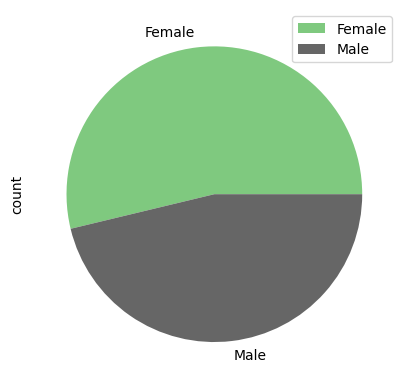

In [123]:
#Visualize gender representation
df['gender'].value_counts().plot(kind='pie', colormap='Accent', legend='auto')

In [124]:
#Count the number of patients of each age group
age_groups_count = df['age'].value_counts()
print(age_groups_count)

age
70-80     26066
60-70     22482
50-60     17256
80-90     17197
40-50      9685
30-40      3775
90-100     2793
20-30      1657
10-20       691
0-10        161
Name: count, dtype: int64


In [125]:
#Count the proportion of age groups
age_group_percentage = df['age'].value_counts(normalize=True) * 100
age_group_percentage = age_group_percentage.round(2)
print(age_group_percentage)

age
70-80     25.61
60-70     22.09
50-60     16.96
80-90     16.90
40-50      9.52
30-40      3.71
90-100     2.74
20-30      1.63
10-20      0.68
0-10       0.16
Name: proportion, dtype: float64


<Axes: xlabel='age', ylabel='count'>

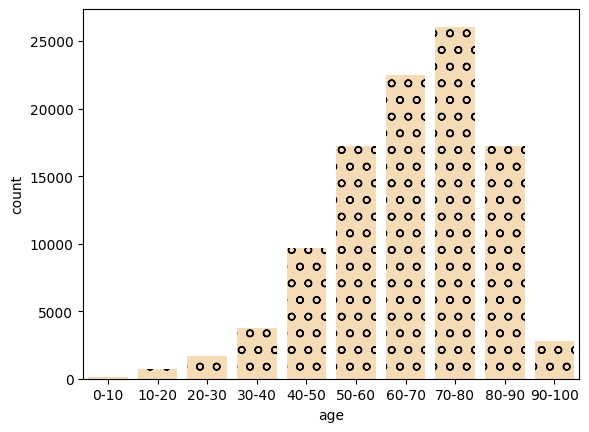

In [182]:
#Visualize age categories
sns.countplot(x='age', data=df, color='navajowhite', hatch='o')

<Axes: xlabel='age', ylabel='Count'>

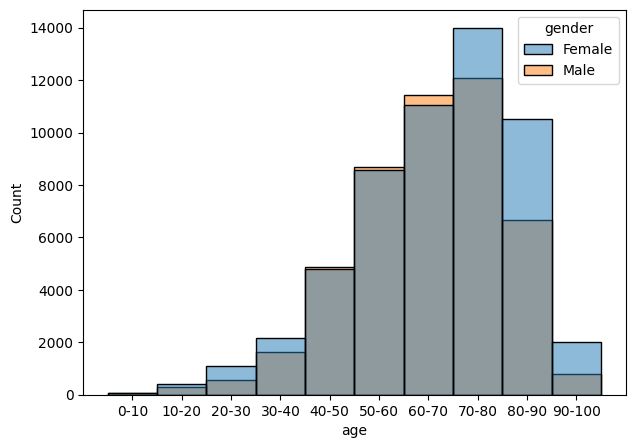

In [176]:
#Visualize age distribution based on gender
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
sns.histplot(data=df, x="age", hue="gender")

<Axes: xlabel='age', ylabel='num_medications'>

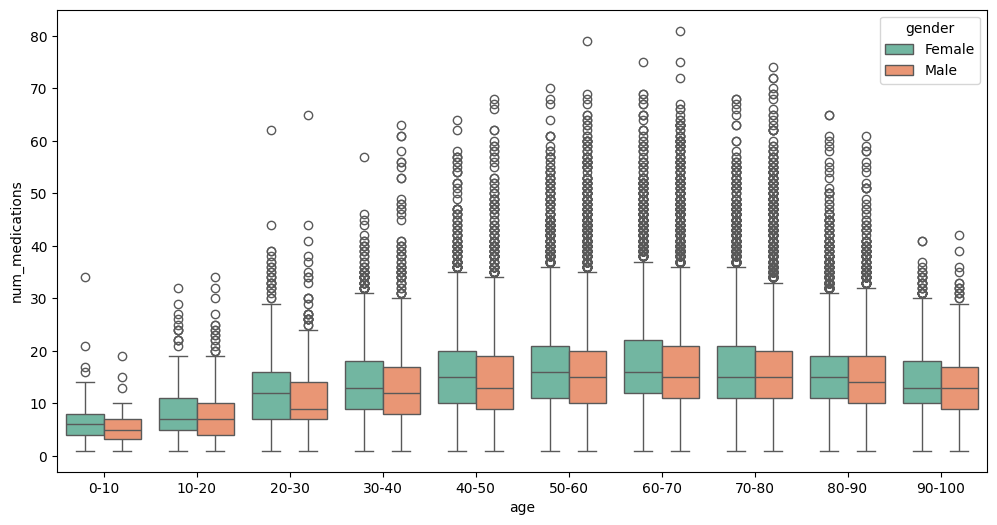

In [155]:
#Relation between age, gender and number of medications
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='age', y='num_medications', hue='gender', legend='full', palette='Set2')

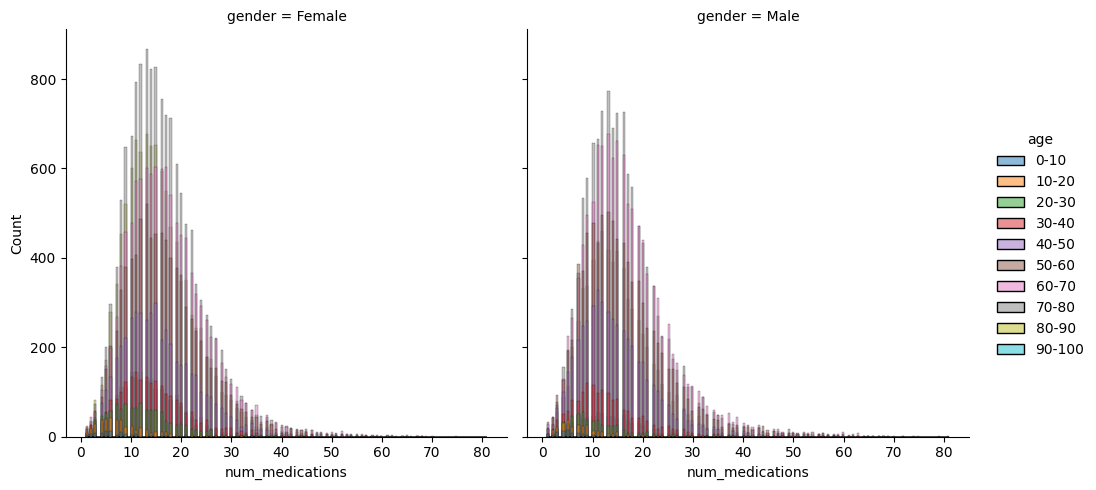

In [129]:
#Another try to view the number of medications used by different age groups and gender
sns.displot(data=df, x='num_medications', hue='age', col='gender')

<Axes: xlabel='Admission Type'>

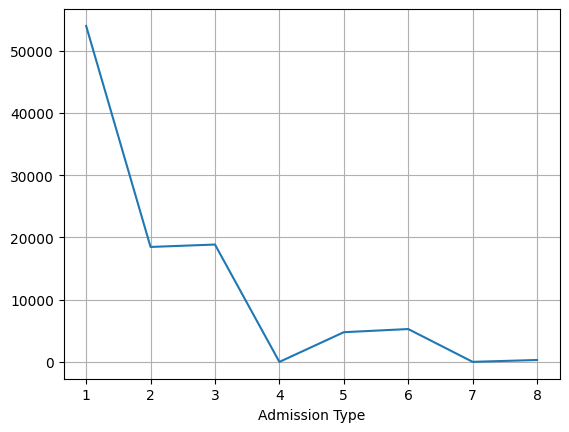

In [120]:
#Group and visualize admission type
admission_df = df.groupby(['admission_type_id'])['encounter_id'].count()
admission_df.plot(xlabel='Admission Type', grid=True)

In [130]:
#Use groupby function to define what age category spent the most time in hospital
time_in_hospital = df.groupby('age').agg({'time_in_hospital': 'count'})
print(time_in_hospital)

        time_in_hospital
age                     
0-10                 161
10-20                691
20-30               1657
30-40               3775
40-50               9685
50-60              17256
60-70              22482
70-80              26066
80-90              17197
90-100              2793


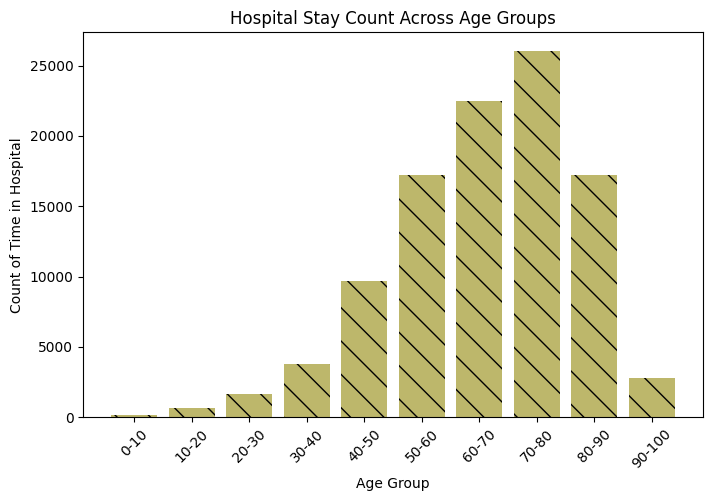

In [171]:
#Visualize time in hospital
plt.figure(figsize=(8, 5))
plt.bar(time_in_hospital.index, time_in_hospital['time_in_hospital'], color='darkkhaki', hatch='\\')

plt.xlabel('Age Group')
plt.ylabel('Count of Time in Hospital')
plt.title('Hospital Stay Count Across Age Groups')
plt.xticks(rotation=45)

plt.show()

In [142]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [143]:
#An attempt to change the view of the dataframe to all 50 columns
#pd.set_option('display.max_columns', 50)
#print(df)

In [144]:
# 61684 steady (44469 steady without insulin), 14245 ups (3344 ups without insulin), 14107 downs (2093 downs without insulin)
patients_with_prescriptions = df[
    df[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
        'tolazamide', 'examide', 'citoglipton', 'insulin',
        'glyburide-metformin', 'glipizide-metformin',
        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
        'metformin-pioglitazone']].eq('Steady').any(axis=1)
]
print(patients_with_prescriptions)

        encounter_id  patient_nbr             race  gender    age weight  \
2              64410     86047875  AfricanAmerican  Female  20-30      ?   
4              16680     42519267        Caucasian    Male  40-50      ?   
5              35754     82637451        Caucasian    Male  50-60      ?   
6              55842     84259809        Caucasian    Male  60-70      ?   
7              63768    114882984        Caucasian    Male  70-80      ?   
...              ...          ...              ...     ...    ...    ...   
101760     443847176     50375628  AfricanAmerican  Female  60-70      ?   
101761     443847548    100162476  AfricanAmerican    Male  70-80      ?   
101762     443847782     74694222  AfricanAmerican  Female  80-90      ?   
101763     443854148     41088789        Caucasian    Male  70-80      ?   
101764     443857166     31693671        Caucasian  Female  80-90      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
2          

In [145]:
#Figure out what specific medications were prescribed to each patient during each visit

#List of medication columns
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
        'tolazamide', 'examide', 'citoglipton', 'insulin',
        'glyburide-metformin', 'glipizide-metformin',
        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
        'metformin-pioglitazone']

#Identify prescribed medications ('Steady', 'Up', or 'Down' -> prescribed)
df['prescribed_meds'] = df[meds].apply(lambda row: [med for med in meds if row[med] in ['Steady', 'Up', 'Down']], axis=1)

#Display patients with their prescribed medications
print(df[['patient_nbr', 'prescribed_meds']])

        patient_nbr                     prescribed_meds
0           8222157                                  []
1          55629189                           [insulin]
2          86047875                         [glipizide]
3          82442376                           [insulin]
4          42519267                [glipizide, insulin]
...             ...                                 ...
101761    100162476                [metformin, insulin]
101762     74694222                           [insulin]
101763     41088789                [metformin, insulin]
101764     31693671  [glipizide, pioglitazone, insulin]
101765    175429310                                  []

[101763 rows x 2 columns]


In [146]:
#Figure out the most prescribed meds
#Flatten the prescribed medications column and count occurrences
med_counts = df['prescribed_meds'].explode().value_counts()

print(med_counts)

prescribed_meds
insulin                     54383
metformin                   19987
glipizide                   12685
glyburide                   10650
pioglitazone                 7327
rosiglitazone                6364
glimepiride                  5191
repaglinide                  1539
glyburide-metformin           706
nateglinide                   703
acarbose                      308
chlorpropamide                 86
tolazamide                     39
miglitol                       38
tolbutamide                    23
glipizide-metformin            13
troglitazone                    3
metformin-rosiglitazone         2
acetohexamide                   1
glimepiride-pioglitazone        1
metformin-pioglitazone          1
Name: count, dtype: int64


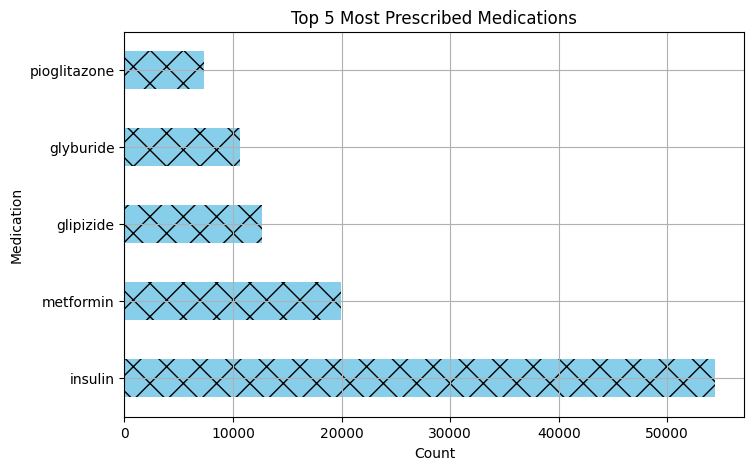

In [186]:
plt.figure(figsize=(8, 5))
med_counts.head(5).plot(kind='barh', color='skyblue', hatch='x', grid=True)
plt.xlabel('Count')
plt.ylabel('Medication')
plt.title('Top 5 Most Prescribed Medications')
plt.show()

In [147]:
#Check if medication count worked correctly
patient_47358018 = df[df['patient_nbr'] == 47358018]
with pd.option_context('display.max_columns', None):
    print(patient_47358018)

       encounter_id  patient_nbr       race  gender    age weight  \
22655      77914260     47358018  Caucasian  Female  50-60      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
22655                  6                         1                   17   

       time_in_hospital payer_code       medical_specialty  \
22655                 1          ?  Family/GeneralPractice   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
22655                  44               0               14                  1   

       number_emergency  number_inpatient diag_1 diag_2 diag_3  \
22655                 0                 0    786    723    250   

       number_diagnoses max_glu_serum A1Cresult metformin repaglinide  \
22655                 5           NaN       NaN    Steady          No   

      nateglinide chlorpropamide glimepiride acetohexamide glipizide  \
22655          No             No          No            No    Steady  

In [148]:
df.drop('weight', axis=1, inplace=True)

In [149]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,prescribed_meds
0,2278392,8222157,Caucasian,Female,0-10,6,25,1,1,?,...,No,No,No,No,No,No,0,0,NO,[]
1,149190,55629189,Caucasian,Female,10-20,1,1,7,3,?,...,Up,No,No,No,No,No,1,1,>30,[insulin]
2,64410,86047875,AfricanAmerican,Female,20-30,1,1,7,2,?,...,No,No,No,No,No,No,0,1,NO,[glipizide]
3,500364,82442376,Caucasian,Male,30-40,1,1,7,2,?,...,Up,No,No,No,No,No,1,1,NO,[insulin]
4,16680,42519267,Caucasian,Male,40-50,1,1,7,1,?,...,Steady,No,No,No,No,No,1,1,NO,"[glipizide, insulin]"


In [150]:
#Figure out "repeating" patients
df['patient_nbr'].value_counts().sort_values(ascending=False)

,count
patient_nbr,
88785891,40
43140906,28
1660293,23
23199021,23
88227540,23
...,...
21775446,1
4700493,1
597528,1


In [151]:
#Have a look on the history of the patient '88785891' displaying all columns
patient_88785891 = df[df['patient_nbr'] == 88785891]
with pd.option_context('display.max_columns', None):
    print(patient_88785891)

        encounter_id  patient_nbr       race  gender    age  \
38307      119039172     88785891  Caucasian  Female  20-30   
40252      125094312     88785891  Caucasian  Female  20-30   
40661      126171582     88785891  Caucasian  Female  20-30   
44515      137245596     88785891  Caucasian  Female  20-30   
45147      139425576     88785891  Caucasian  Female  20-30   
45986      141994242     88785891  Caucasian  Female  20-30   
50167      150986298     88785891  Caucasian  Female  20-30   
50393      151413846     88785891  Caucasian  Female  20-30   
50773      152188656     88785891  Caucasian  Female  20-30   
51519      153558456     88785891  Caucasian  Female  20-30   
52057      154527444     88785891  Caucasian  Female  20-30   
53771      157363182     88785891  Caucasian  Female  20-30   
54497      158500410     88785891  Caucasian  Female  20-30   
60263      168920160     88785891  Caucasian  Female  20-30   
62759      174689286     88785891  Caucasian  Female  2

In [152]:
#The patient '88785891' uses only insulin (26 ups and 13 downs, 0 steady)

presciptions = df[
    (df['patient_nbr'] == 88785891) &
    (df[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
         'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
         'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
         'tolazamide', 'examide', 'citoglipton', 'insulin',
         'glyburide-metformin', 'glipizide-metformin',
         'glimepiride-pioglitazone', 'metformin-rosiglitazone',
         'metformin-pioglitazone']].eq('Up').any(axis=1))
]
print(presciptions)

       encounter_id  patient_nbr       race  gender    age  admission_type_id  \
38307     119039172     88785891  Caucasian  Female  20-30                  1   
40661     126171582     88785891  Caucasian  Female  20-30                  1   
44515     137245596     88785891  Caucasian  Female  20-30                  3   
45147     139425576     88785891  Caucasian  Female  20-30                  1   
45986     141994242     88785891  Caucasian  Female  20-30                  2   
50167     150986298     88785891  Caucasian  Female  20-30                  2   
50393     151413846     88785891  Caucasian  Female  20-30                  1   
50773     152188656     88785891  Caucasian  Female  20-30                  2   
51519     153558456     88785891  Caucasian  Female  20-30                  2   
52057     154527444     88785891  Caucasian  Female  20-30                  2   
60263     168920160     88785891  Caucasian  Female  20-30                  1   
62759     174689286     8878